# Exploring Sales Data
- Distribution
- Sales behavior before, during and after holiday
- Seasonal purchase behaviors
- correlation b.n sales and number of customers
- Effect of promo on sales/customer
- 

In [1]:
import imp
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

In [2]:
#import custome modules
sys.path.append('../')
from scripts import data_loader

from scripts.get_missing_information import MissingInformation
from scripts.ploting_utils import Plotters
from scripts.data_clean_handler import CleanData
cleaner = CleanData()
minfo = MissingInformation()

In [3]:
train_df = pd.read_csv('../data/raw/train.csv')
test_df = pd.read_csv('../data/raw/test.csv')
store_df = pd.read_csv('../data/cleaned/store.csv')

/var/folders/6b/0t1qb1d92f72c46kvp35pwfc0000gn/T/ipykernel_27410/3481592072.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('../data/raw/train.csv')


In [4]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
store_df.head()


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,15700.0,4.0,2015.0,0,NaN,NaN,NaN


##### Since we have seen the data for store in ***StoreDataExploration.ipynb*** lest see the data eploration for the sales data(train_df)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [13]:
minfo.missing_values_table(train_df)

,Missing Values,% of Total Values,Dtype


##### It contains 1017209 with 9 rows, there is missing values seen from this table.

In [7]:
np.random.seed(12345)
data = np.array( [ np.random.normal( i, 1, 10 ) for i in range(3) ] )
ii = np.array([ 3, 5, 8 ] )
df = pd.DataFrame( data=data, index=ii )
df

,0,1,2,3,4,5,6,7,8,9
3,-0.204708,0.478943,-0.519439,-0.555730,1.965781,1.393406,0.092908,0.281746,0.769023,1.246435
5,2.007189,-0.296221,1.274992,1.228913,2.352917,1.886429,-1.001637,0.628157,2.669025,0.561430
8,1.460259,2.476985,5.248944,0.978772,1.422913,2.124121,2.302614,2.523772,2.000940,3.343810


{'whiskers': [<matplotlib.lines.Line2D at 0x1541aa7a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1541aadd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1541aa4d0>,
 'medians': [<matplotlib.lines.Line2D at 0x1541ab2e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1541ab5b0>,
 'means': []}

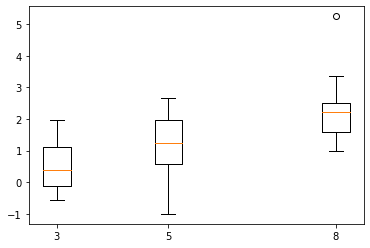

In [8]:
plt.boxplot( [ df.loc[i] for i in df.index ], vert=True, positions=ii )

In [9]:
np.random.seed(12345)
data = np.array( [ np.random.normal( i, 1, 10 ) for i in range(3) ] )
dates = pd.to_datetime( [ '2015-06-01', '2015-06-15', '2015-08-30' ] )
df = pd.DataFrame( data=data, index=dates )
df

,0,1,2,3,4,5,6,7,8,9
2015-06-01,-0.204708,0.478943,-0.519439,-0.555730,1.965781,1.393406,0.092908,0.281746,0.769023,1.246435
2015-06-15,2.007189,-0.296221,1.274992,1.228913,2.352917,1.886429,-1.001637,0.628157,2.669025,0.561430
2015-08-30,1.460259,2.476985,5.248944,0.978772,1.422913,2.124121,2.302614,2.523772,2.000940,3.343810


{'whiskers': [<matplotlib.lines.Line2D at 0x1542ce1a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1542ce5f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1542cded0>,
 'medians': [<matplotlib.lines.Line2D at 0x1542ceb90>,
 'fliers': [<matplotlib.lines.Line2D at 0x1542cee60>,
 'means': []}

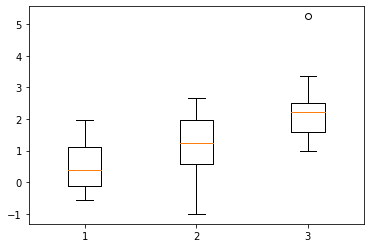

In [10]:
plt.boxplot( [ df.loc[i] for i in df.index ], vert=True )

In [11]:
np.random.seed(12345)
data = np.array( [ np.random.normal( i, 1, 10 ) for i in range(3) ] )
dates = pd.to_datetime( [ '2015-06-01', '2015-06-15', '2015-08-30' ] )
df = pd.DataFrame( data=data, index=dates )
df

,0,1,2,3,4,5,6,7,8,9
2015-06-01,-0.204708,0.478943,-0.519439,-0.555730,1.965781,1.393406,0.092908,0.281746,0.769023,1.246435
2015-06-15,2.007189,-0.296221,1.274992,1.228913,2.352917,1.886429,-1.001637,0.628157,2.669025,0.561430
2015-08-30,1.460259,2.476985,5.248944,0.978772,1.422913,2.124121,2.302614,2.523772,2.000940,3.343810


[Text(31, 0, '2015-06-01'),
 Text(45, 0, '2015-06-15'),
 Text(121, 0, '2015-08-30')]

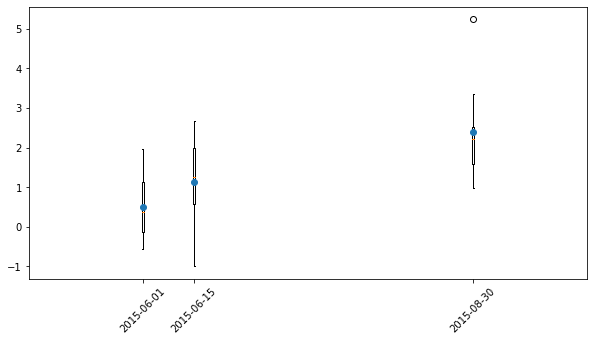

In [12]:

fig, ax = plt.subplots( figsize=(10,5) )
x1 = pd.to_datetime( '2015-05-01' )
x2 = pd.to_datetime( '2015-09-30' )
pos = ( dates - x1 ).days

ax.boxplot( [ df.loc[i] for i in df.index ], vert=True, positions=pos )
ax.plot( pos, [ df.loc[i].mean() for i in df.index ], 'o' )

ax.set_xlim( [ 0, (x2-x1).days ] )
ax.set_xticklabels( dates.date, rotation=45 )